In [1]:
class DisjointSets(object):
    def __init__(self,n):
        self.sets = [-1]*n
        self.counter = n
    def parent(self,i):
        while True:
            j = self.sets[i]
            if j<0:
                return i
            i = j
    def join(self,i,j):
        i,j = self.parent(i),self.parent(j)
        if i!=j:
            self.sets[i] += self.sets[j]
            self.sets[j] = i
            return True
        return False
    def joined(self,i,j):
        return self.parent(i) == self.parent(j)
    def __len__(self):
        return self.counter
    

In [22]:
import random

def make_mage(n,d):
    walls = [(i,i+n**j) for i in range(n**2) for j in range(d) if (i/n**j)%n+1 < n]
    torn_down_walls =[]
    ds = DisjointSets(n**d)
    random.shuffle(walls)
    for i,wall in enumerate(walls):
        if ds.join(wall[0],wall[1]):
            torn_down_walls.append(wall)
        if len(ds) ==1:
            break
    walls = [wall for wall in walls if not wall in torn_down_walls]
    return walls, torn_down_walls
    

In [54]:
walls, torn_down_walls = make_mage(n=4,d=2)

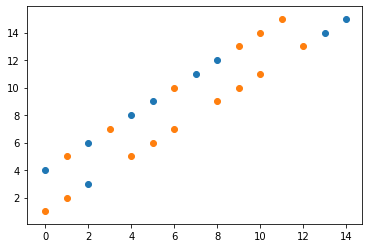

In [55]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array(walls)
y = np.array(torn_down_walls)

plt.scatter(x[:,0],x[:,1])
plt.scatter(y[:,0],y[:,1])
plt.show()





In [57]:
print (walls)
print (torn_down_walls)


[(13, 14), (5, 9), (8, 12), (14, 15), (2, 3), (2, 6), (4, 8), (0, 4), (7, 11)]
[(9, 10), (11, 15), (5, 6), (12, 13), (1, 5), (6, 10), (6, 7), (1, 2), (8, 9), (9, 13), (10, 14), (3, 7), (10, 11), (0, 1), (4, 5)]


In [60]:
walls = [(i,i+4**j) for i in range(4**2) for j in range(2) if (i/4**j)%4+1 < 4]
print (walls)


[(0, 1), (0, 4), (1, 2), (1, 5), (2, 3), (2, 6), (3, 7), (4, 5), (4, 8), (5, 6), (5, 9), (6, 7), (6, 10), (7, 11), (8, 9), (8, 12), (9, 10), (9, 13), (10, 11), (10, 14), (11, 15), (12, 13), (13, 14), (14, 15)]
